In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.fft import fft, fftfreq, rfft

In [249]:
# Functions for data analysis:
def square(array):
    return [i**2 for i in array]

def sample_variance(data):
    meanD = np.mean(data)
    varD = 0
    for i in range(len(data)):
        varD += (data[i]-meanD)**2
    s2 = 1/(len(data)-1)*varD
    return s2

def SEM(data):
    s = np.sqrt(sample_variance(data))
    return s/np.sqrt(len(data))

def freq_dict_maker(freq_data, volt_data):
    freq_array = np.unique(freq_data)
    freq_dict = {}

    for freq in freq_array:
        freq_dict[freq] = []
        for index in range(len(freq_data)):
            if freq == freq_data[index]:
                freq_dict[freq] += [volt_data[index]]

    return freq_dict
            
def meanAndStd(freq_data, volt_data):
    freq_array = np.unique(freq_data)
    freq_dict = freq_dict_maker(freq_data, volt_data)
    SEM_array = [SEM(freq_dict[freq]) for freq in freq_array]
    mean_array = [np.mean(freq_dict[freq]) for freq in freq_array]
    return freq_array, mean_array, SEM_array
      

def area_under_points(freq_data, volt_data, uncert_data):
    uncert_data = [volt_data[i] * 2 * uncert_data[i] for i in range(len(uncert_data))]
    volt_data = [volt_data[i]**2 for i in range(len(volt_data))]
    
    
    range_array = []
    midpoint_volt_array = []
    uncert_array = []
    max_volt_array = []
    min_volt_array = []
    
    for i in range(len(freq_data)-1):
        #print(freq_data[i+1])
        range_array += [freq_data[i+1]- freq_data[i]]
        midpoint_volt_array += [(volt_data[i]+ volt_data[i+1])/2]
        max_volt_array += [max(volt_data[i], volt_data[i+1])]
        min_volt_array += [min(volt_data[i], volt_data[i+1])]
        uncert_array += [np.sqrt(uncert_data[i]**2+ uncert_data[i+1]**2)]
        
    area = np.sum([range_array[i]*midpoint_volt_array[i] for i in range(len(range_array))])
    max_area = ( np.sum([range_array[i]*max_volt_array[i] for i in range(len(range_array))]))
    min_area = ( np.sum([range_array[i]*min_volt_array[i] for i in range(len(range_array))]))
    
    
    area_uncert = np.sqrt(np.sum(square([range_array[i]*uncert_array[i] for i in range(len(range_array))])))
    return area, area_uncert, max_area, min_area

def RMS(array):
    MS = 0
    for i in array:
        MS+=i**2
    return np.sqrt(MS/len(array))

In [250]:
#input_v = 10**(-65/20)*.01*10**4

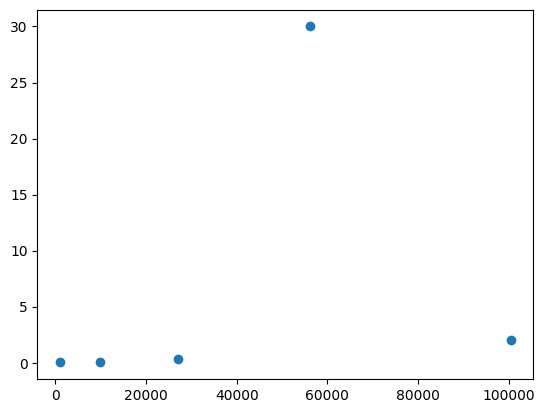

In [251]:
# Resistor Data
R_1k = 1.00292e3
R_1k_err = .00003e3

R_10k = 9.9494e3
R_10k_err = .00002e3

R_27k = 27.1408e3
R_27k_err = .0003e3

R_56k = 56.14e3
R_56k_err = .03e3

R_100k = .100438e6
R_100k_err = .000002e6

R_array = [R_1k, R_10k, R_27k, R_56k, R_100k]
R_err_array = [R_1k_err, R_10k_err, R_27k_err, R_56k_err, R_100k_err]
plt.scatter(R_array, R_err_array)

In [275]:
# Temperature Data
Tc = [291.17, 291.1, 291.95]
Tt = [293.93, 293.65, 293.93]
Tc_mean = np.mean(Tc)
Tc_sem = SEM(Tc)
Tt_mean = np.mean(Tt)
Tt_sem = SEM(Tt)

T = (Tc_mean+ Tt_mean)/2
T_err = SEM([Tt_mean, Tc_mean])


In [253]:
# RMS Data in mV:
RMS_1k = [20.281, 20.313, 20.316, 20.298, 20.289, 20.278, 20.245, 20.195, 20.207, 20.189, 20.208, 20.149]
RMS_10k = [28.528, 28.474, 28.529, 28.572, 28.510, 28.512, 28.588, 28.492, 28.551, 28.547, 28.614, 28.673]
RMS_100k = [75.79, 75.78, 75.77, 75.78, 75.96, 75.99, 75.72, 75.62, 75.96, 75.79, 75.76, 75.88]
RMS_27k = [45.535, 45.443, 45.391, 45.479, 45.549, 45.596, 45.515, 45.574, 45.446, 45.502, 45.423, 45.456, 45.409]
RMS_56k = [60.152, 60.027, 59.998, 60.037, 60.037, 60.136, 60.000, 60.092, 60.095, 59.958, 60.000, 59.974, 60.125]


<ErrorbarContainer object of 3 artists>

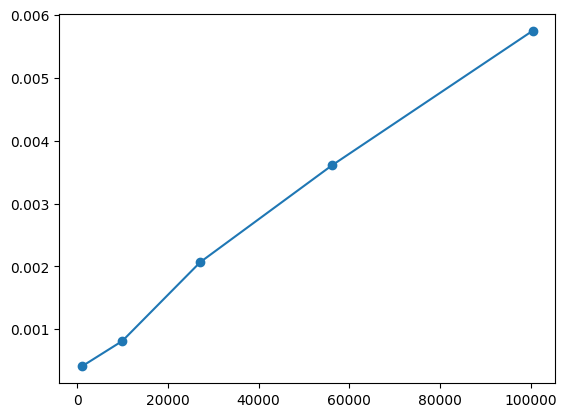

In [254]:
RMS_array = []
RMS_err_array = []
for i in [RMS_1k, RMS_10k, RMS_27k, RMS_56k, RMS_100k]:
    RMS_array += [np.mean(i)*1e-3]
    RMS_err_array += [SEM(i)*1e-3]


MS_array = square(RMS_array)
MS_err_array = [2 * RMS_array[i]*RMS_err_array[i] for i in range(len(MS_array))]

#plt.errorbar(R_array, RMS_array, yerr=  RMS_err_array, fmt = "o-")
plt.errorbar(R_array, MS_array, xerr = R_err_array, yerr=  MS_err_array, fmt = "o-")
    

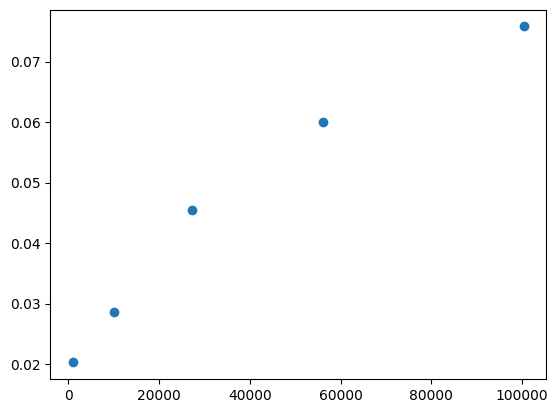

In [255]:
plt.scatter(R_array, RMS_array)

In [256]:
input_v = 10**(-65/20)*.01

In [311]:
gain_100k = pd.read_csv("gain_data/100k_filter_x.csv")
gain_56k = pd.read_csv("gain_data/56k_filter_x.csv")
gain_27k = pd.read_csv("gain_data/27k_filter_x.csv")
gain_10k = pd.read_csv("gain_data/10k_filter_x.csv")
gain_1k = pd.read_csv("gain_data/1k_filter_x.csv")

d = { 1e3: {"Frequency": gain_1k["Frequency"],
            "Voltage": gain_1k["Voltage"]/input_v,
            "Symbol": "1 MΩ"},
     1e4: {"Frequency": gain_10k["Frequency"],
                "Voltage": gain_10k["Voltage"]/input_v,
                "Symbol": "100 KΩ"},
     27e3: {"Frequency": gain_27k["Frequency"],
            "Voltage": gain_27k["Voltage"]/input_v,
            "Symbol": "10 KΩ"},
     56e3: {"Frequency": gain_56k["Frequency"],
            "Voltage": gain_56k["Voltage"]/input_v,
            "Symbol": "1 KΩ"},
     1e5: {"Frequency": gain_100k["Frequency"],
            "Voltage": gain_100k["Voltage"]/input_v,
            "Symbol": "100 Ω"}
                    }

In [312]:
max(d[1e5]["Voltage"])

7311.39579437503

In [313]:
# def fit_to_high_pass(data):

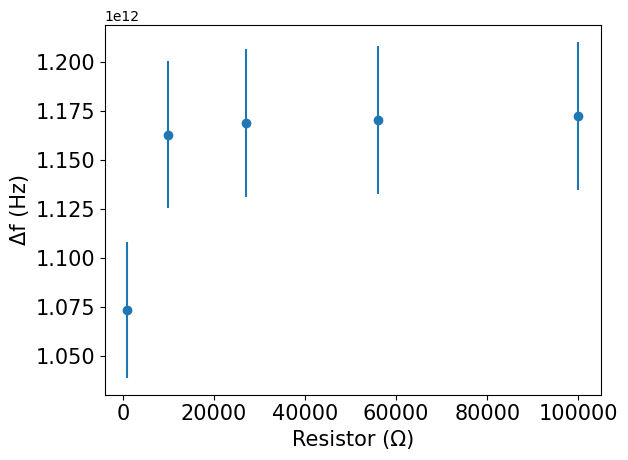

In [364]:
"""def area_under_points_2(freq_data, volt_data, uncert_data):
    range_array = []
    midpoint_volt_array = []
    uncert_array = []
    for i in range(len(freq_data)-1):
        #print(freq_data[i+1])
        range_array += [freq_data[i+1]- freq_data[i]]
        midpoint_volt_array += [(volt_data[i]**2+ volt_data[i+1]**2)/2]
        uncert_array += [np.sqrt(uncert_data[i]+ uncert_data[i+1])]
    area = ( np.sum([range_array[i]*midpoint_volt_array[i] for i in range(len(range_array))]))
    area_uncert = np.sum(square([range_array[i]*uncert_array[i] for i in range(len(range_array))]))
    return area, area_uncert"""

for resistor in d.keys():
    d[resistor]["Frequency_Unique"], d[resistor]["Mean"], d[resistor]["SEM"] =  meanAndStd(d[resistor]["Frequency"], d[resistor]["Voltage"])


    
for key in d.keys():
    f_additional = np.logspace(5, 8, 10000)
    d[key]["Frequency_Unique"] = np.concatenate((d[key]["Frequency_Unique"], f_additional))
    v_additional = [d[key]["Mean"][-1:][0]*(1/10)**(np.log10(f))*1e5 for f in f_additional]
    d[key]["Mean"] = np.concatenate((d[key]["Mean"], v_additional))
    d[key]["SEM"] += [0]*10000
    d[key]["delta_f"], d[key]["delta_f_uncert"], d[key]["max_delta_f"], d[key]["min_delta_f"] = area_under_points(d[key]["Frequency_Unique"], d[key]["Mean"], d[key]["SEM"])


delta_f_array = []
delta_f_uncert_array = []
max_delta_f_array = []
min_delta_f_array = []

resistors = list(d.keys())




for resistor in resistors:
    max_delta_f_array += [d[resistor]["max_delta_f"]]
    min_delta_f_array += [d[resistor]["min_delta_f"]]
    delta_f_array += [d[resistor]["delta_f"]]
    delta_f_uncert_array += [d[resistor]["delta_f_uncert"]]


#plt.errorbar(resistors, delta_f_array, yerr = delta_f_uncert_array, fmt = "o")
#plt.errorbar(resistors, max_delta_f_array, yerr = delta_f_uncert_array, fmt = "o")
#plt.errorbar(resistors, min_delta_f_array, yerr = delta_f_uncert_array, fmt = "o")


delta_f_err = [np.sqrt((max_delta_f_array[i] - delta_f_array[i])**2 + (min_delta_f_array[i] - delta_f_array[i])**2)/2 for i in range(len(delta_f_array))]

plt.errorbar(resistors, delta_f_array, yerr = delta_f_err, fmt = "o")
plt.xlabel('Resistor (Ω)', fontsize = 15)
plt.ylabel('Δf (Hz)', fontsize = 15)

plt.tick_params(axis='both', labelsize=15)

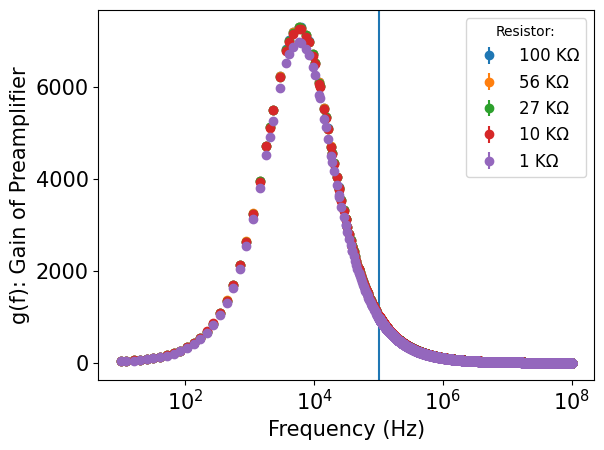

In [368]:
plt.errorbar(d[1e5]["Frequency_Unique"], d[1e5]["Mean"], yerr = d[1e5]["SEM"], fmt = "o", label = '100 KΩ')
plt.errorbar(d[56e3]["Frequency_Unique"], d[56e3]["Mean"],yerr = d[56e3]["SEM"], fmt = "o", label = '56 KΩ')
plt.errorbar(d[27e3]["Frequency_Unique"], d[27e3]["Mean"],yerr = d[27e3]["SEM"], fmt = "o", label = '27 KΩ')
plt.errorbar(d[1e4]["Frequency_Unique"], d[1e4]["Mean"],yerr = d[1e4]["SEM"], fmt = "o", label = '10 KΩ')
plt.errorbar(d[1e3]["Frequency_Unique"], d[1e3]["Mean"],yerr = d[1e3]["SEM"], fmt = "o", label = '1 KΩ')

plt.xlabel('Frequency (Hz)', fontsize = 15)
plt.ylabel('g(f): Gain of Preamplifier', fontsize = 15)
plt.xscale('log')
plt.legend(title = "Resistor:", fontsize = 12)
plt.axvline(1e5)

plt.tick_params(axis='both', labelsize=15)

In [323]:
resistors, R_array

([1000.0, 10000.0, 27000.0, 56000.0, 100000.0],
 [1002.92, 9949.4, 27140.8, 56140.0, 100438.0])

4.021184619179086e-23 8.894195762361865e-25
2.7199023490041324e-19 1.00506448487023e-20


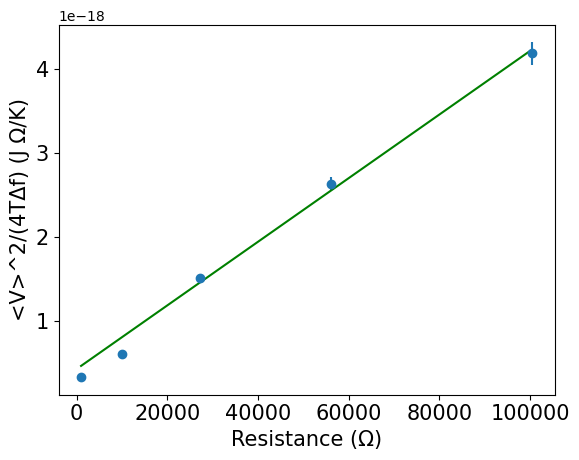

In [355]:
y_arr = [MS_array[i]/(4 * T * delta_f_array[i]) for i in range(len(RMS_array))]
y_arr_err = [np.sqrt( (MS_err_array[i]/(4 * T * delta_f_array[i]))**2 + (MS_array[i]/(4 * T**2 * delta_f_array[i])*T_err)**2+(MS_array[i]/(4 * T * delta_f_array[i]**2)*delta_f_err[i])**2) for i in range(len(MS_array))]

plt.errorbar(R_array, y_arr, yerr = y_arr_err, fmt = "o")

from scipy.optimize import curve_fit

def fit_func(x, a, b):
    y = a*x+b
    return y

def sample_variance(data):
    meanD = np.mean(data)
    varD = 0
    for i in range(len(data)):
        varD += (data[i]-meanD)**2
    s2 = 1/(len(data)-1)*varD
    return s2

def SEM(data):
    s = np.sqrt(sample_variance(data))
    return s/np.sqrt(len(data))

aR = curve_fit(fit_func, R_array, y_arr, sigma = y_arr_err, absolute_sigma = True)
a = aR[0][0]
a_err = np.sqrt(aR[1][0][0])

b = aR[0][1]
b_err = np.sqrt(aR[1][1][1])

test_r = np.logspace(3, 5, 100)
test_y = fit_fn(test_r, popt[0], popt[1])
plt.plot(test_r, test_y, c = 'g')

print(a, a_err)
print(b, b_err)
#plt.xscale('log')
#|plt.yscale('log')
plt.xlabel('Resistance (Ω)', fontsize = 15)
plt.ylabel('<V>^2/(4TΔf) (J Ω/K)', fontsize = 15 )
plt.tick_params(axis='both', labelsize=15)

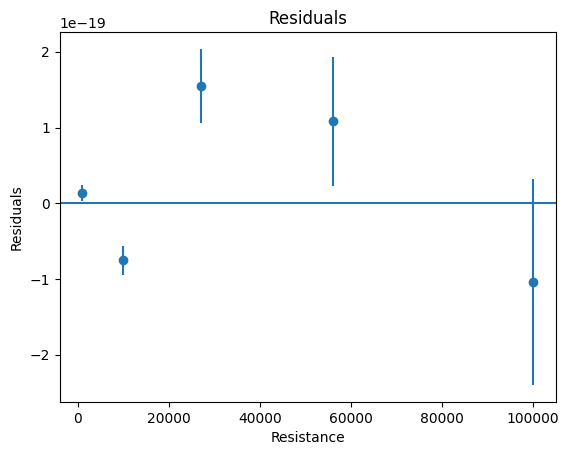

In [345]:
residuals = [y_arr[i] - fit_func(resistors[i], a, b) for i in range(len(y_arr))]

plt.errorbar(resistors, residuals, yerr = y_arr_err, fmt = "o")
plt.axhline()
plt.title("Residuals")
plt.xlabel("Resistance")
plt.ylabel("Residuals")
plt.tick_params(axis='both', labelsize=10)

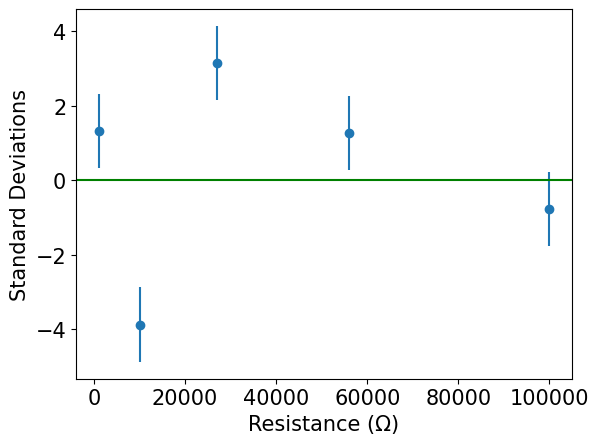

In [356]:
normalized_residuals = [residuals[i]/y_arr_err[i] for i in range(len(y_arr_err))]
normalized_error = [y_arr_err[i]/y_arr_err[i] for i in range(len(y_arr_err))]

plt.errorbar(resistors, normalized_residuals, yerr = normalized_error, fmt = "o")
plt.axhline(color = 'green')
#plt.xscale('log')
plt.xlabel("Resistance (Ω)", fontsize = 15)
plt.ylabel("Standard Deviations", fontsize = 15)

plt.tick_params(axis='both', labelsize=15)

In [361]:
chi_squared = sum([normalized_residuals[i]**2 for i in range(len(normalized_residuals))])
M = len(resistors)
df = M - 1
reduced_chi_squared = chi_squared/df
print(chi_squared)
print(reduced_chi_squared)
from scipy.stats import chi2
PTE = 1- chi2.cdf(chi_squared, df = df)
print(PTE)

28.858921454558295
7.214730363639574
8.350559535186264e-06


In [359]:
RMS_array[4]**2/(4*298*10**5*(d[1e5]["delta_f"]))

4.021184619179086e-23 8.894195762361865e-25
2.7199023490041324e-19 1.00506448487023e-20


4.113530869333504e-23

In [ ]:
chi2 = 7.214730363639574

In [369]:
.01 * 10**(-3.25)

5.623413251903491e-06